# Применение PCA к реальному датасету
---
## Цели эксперимента

1. **Реализация и проверка PCA**
   - Вычислить главные компоненты для исходного набора данных размерности 4.
   - Оценить долю объяснённой дисперсии $\gamma(k)$ при разном числе компонент $k$.
   - Построить графики зависимости $\gamma$ и ошибки восстановления (MSE) от $k$.

2. **Оценка сохранения информативности с помощью 1-NN**
   - Применить алгоритм 1-Nearest Neighbor к исходным данным и к их двумерной проекции.
   - Измерить метрику $\mathrm{accuracy}_{1\text{-NN}}$ до и после понижения размерности.

---

In [1]:
from src.apply_pca_to_dataset import apply_pca_to_dataset
from src.plot_pca_projection import plot_pca_projection
from src.knn_accuracy import knn_accuracy
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
X_raw = [list(map(float, row)) for row in iris.data]
y = list(iris.target)
n, m = len(X_raw), len(X_raw[0])
print(f"Loaded Iris: n={n}, m={m}")

Loaded Iris: n=150, m=4


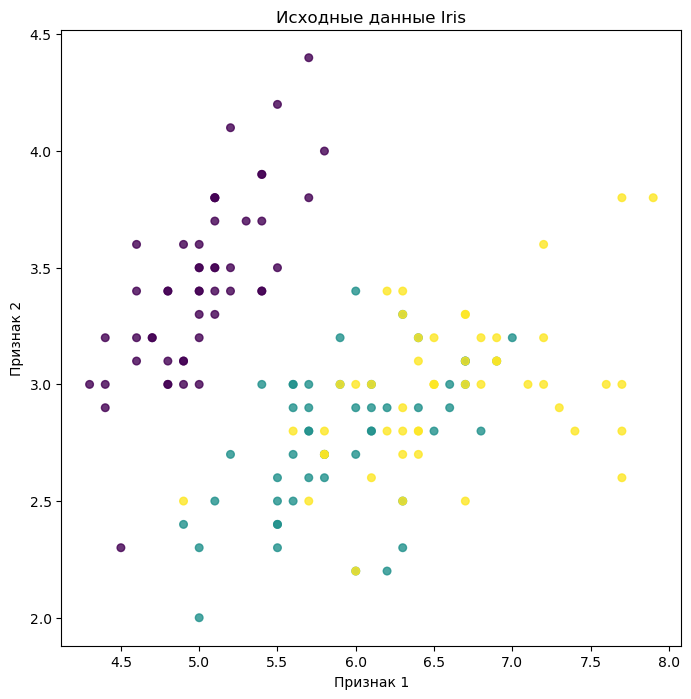

In [3]:
plt.figure(figsize=(8,8))
plt.scatter(
    [row[0] for row in X_raw],
    [row[1] for row in X_raw],
    c=y, cmap='viridis', s=30, alpha=0.8)

plt.title("Исходные данные Iris")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()

---
## Метрики эксперимента

In [16]:
acc_before = knn_accuracy(X_raw, y)
X_mat, acc = apply_pca_to_dataset('iris', 2)

1-NN accuracy до PCA: 0.9600
Объяснённая дисперсия (γ) = 0.9777
1-NN accuracy после PCA: 0.9600


---
### 1-NN accuracy (Leave-One-Out)

**Что измеряет:**
Доля объектов, правильно классифицированных алгоритмом «ближайшего соседа» с $k=1$, если каждый раз при предсказании мы исключаем текущий объект из тренировочной выборки:

$$
\mathrm{accuracy}_{1\text{-NN}}
= \frac{1}{n}\sum_{i=1}^{n}
\begin{cases}
1, & \text{если } \hat y_i = y_i,\\
0, & \text{иначе},
\end{cases}
$$
где $\hat y_i$ — метка ближайшего $L_2$-соседа для $i$-го объекта (без учёта самого себя).

---

### Объяснённая дисперсия $\gamma$

**Что измеряет:**
Доля общей дисперсии данных, захваченная первыми $k$ главными компонентами:

$$
\gamma(k)
= \frac{\sum_{i=1}^{k}\lambda_i}{\sum_{j=1}^{m}\lambda_j},
$$
где $\lambda_1 \ge \lambda_2 \ge \dots \ge \lambda_m$ — собственные значения ковариационной матрицы.

---

### Выводы на основе метрик

1. **Высокая точность (0.96) до PCA** показывает, что 1-NN на оригинальных 4 признаках разделяет классы почти без ошибок.

2. **$\gamma \approx 0.98$** означает, что первые две компоненты сохраняют 98 % разброса исходных данных.

3. **Точность после PCA не изменилась (0.96 → 0.96)**, что говорит о том, что снижение размерности до двух измерений практически не ухудшило разделимость классов и сохранило ключевую информацию.

---

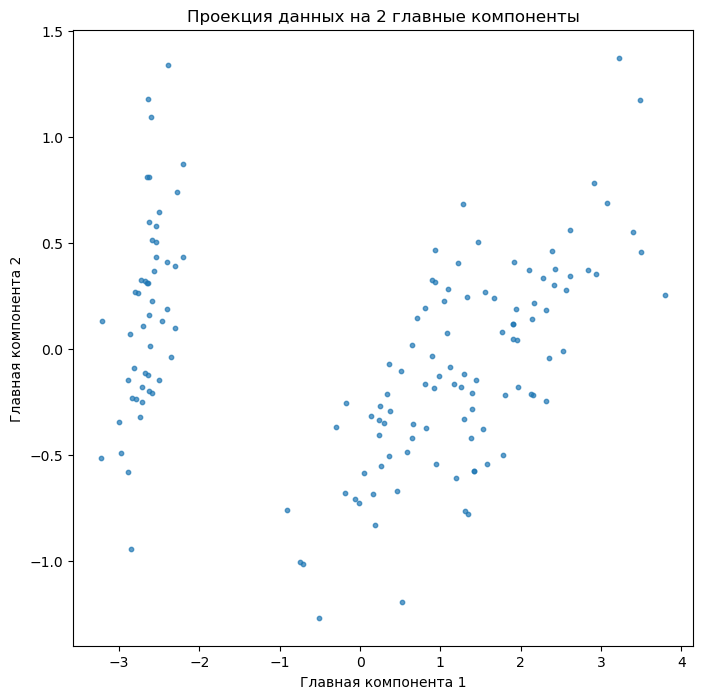

In [56]:
fig = plot_pca_projection(X_mat)
plt.show(fig)

## Выводы

1. Первые две главные компоненты объясняют $\gamma\approx0.98$ суммарной дисперсии, что позволяет уменьшить размерность с 4 до 2 без значимой потери информации.

2. Метрика $1$-NN accuracy сохраняется на уровне $\approx0.96$ до и после PCA, подтверждая, что двумерная проекция адекватно отражает структуру классов.

---